In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx

In [2]:
# Unit vecotrs for reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

In [3]:
# Axial dimensions
a = 79 # [mm]
b = 70.5 # [mm]
c = 59.25 # [mm]
# From technical drawing anf bearing's width
offset = 46 - 16 # [mm]

In [4]:
# Input motor
input_motor = pygritbx.Motor(name="Input Motor", loc=0, power=31.5*1e3, n=1500, axis=k)

In [5]:
# Material
gear_material = pygritbx.Material("Steel", sigma_u=1060, sigma_y=930, sigma_Dm1=0, HB=700)
A2_material = pygritbx.Material("16MnCr5", sigma_u=1060, sigma_y=930, sigma_Dm1=700, HB=0)

In [6]:
# Gears
# G1
G1 = pygritbx.Gear(name="G1", axis=k, loc=a+b, m_n=3, z=16, psi=-15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G2
G2 = pygritbx.Gear(name="G2", axis=k, loc=a+b+offset, m_n=3, z=48, psi=15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G3
G3 = pygritbx.Gear(name="G3", axis=k, loc=a+offset, m_n=4, z=21, psi=-15, phi_n=20, Q_v=8, FW=56, material=gear_material)
# G4
G4 = pygritbx.Gear(name="G4", axis=k, loc=a, m_n=4, z=63, psi=15, phi_n=20, Q_v=8, FW=56, material=gear_material) 

In [7]:
# Supports
# A
A = pygritbx.Support(name="A", type="Roller", bearingType="Cylindrical", catalogueName="NU 206 ECP", 
                     catalogueType="Explorer", d=30, D=62, B=16, C=44*1e3, C0=36.5*1e3, Pu=4.5*1e3, nr=13*1e3,
                     a=8, e=0.3, X=0, Y=0.4, Y0=0, Y1=0, Y2=0, A=0, kr=0.15, shoulder=1, arr="Single", axis=k, loc=0)
# B
B = pygritbx.Support(name="B", type="Pin", bearingType="Tapered", catalogueName="30206 DF", 
                     catalogueType="Explorer", d=30, D=62, B=34.5, C=85.7*1e3, C0=88*1e3, Pu=9.65*1e3, nr=7500,
                     a=17.25, e=0.37, X=0, Y=0, Y0=1.8, Y1=1.8, Y2=2.7, A=0, kr=0, shoulder=-1, arr="F2F", axis=k, loc=a+b+c)
# C
C = pygritbx.Support(name="C", type="Roller", bearingType="Cylindrical", catalogueName="NU 209 ECP", 
                     catalogueType="Explorer", d=45, D=85, B=19, C=69.5*1e3, C0=64*1e3, Pu=8.15*1e3, nr=9*1e3,
                     a=9.5, e=0.3, X=0, Y=0.4, Y0=0, Y1=0, Y2=0, A=0, kr=0.15, shoulder=1, arr="Single", axis=k, loc=offset)
# D
D = pygritbx.Support(name="D", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, X=0, Y=0, Y0=1.6, Y1=1.7, Y2=2.5, A=0, kr=0, shoulder=0, arr="F2F", axis=k, loc=a+b+c+offset)
# E
E = pygritbx.Support(name="E", type="Roller", bearingType="Cylindrical", catalogueName="NU 2210 ECP", 
                     catalogueType="Explorer", d=50, D=90, B=23, C=90*1e3, C0=88*1e3, Pu=11.4*1e3, nr=8500,
                     a=11.5, e=0.3, X=0, Y=0.4, Y0=0, Y1=0, Y2=0, A=0, kr=0.2, shoulder=1, arr="Single", axis=k, loc=0)
# F
F = pygritbx.Support(name="F", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, X=0, Y=0, Y0=1.6, Y1=1.7, Y2=2.5, A=0, kr=0, shoulder=0, arr="F2F", axis=k, loc=a+b+c)

In [8]:
# Output Component
output = pygritbx.Component(name="Output", material=None, axis=k, loc=a+b+c+80)

In [9]:
# Gearbox Configuration
# Shaft A1
A1 = pygritbx.Shaft(name="A1", inputs=[input_motor], outputs=[G1], axis=k, material=None, sups=np.array([A, B]), loc=[0, 0, 0])
# Mesh M1
M1 = pygritbx.GearMesh(name="M1", drivingGear=G1, drivenGear=G2, axis=i, type="External")
# Shaft A2
A2 = pygritbx.Shaft(name="A2", inputs=[G2], outputs=[G3], axis=k, material=A2_material, sups=np.array([C, D]))
# Mesh M2
M2 = pygritbx.GearMesh(name="M2", drivingGear=G3, drivenGear=G4, axis=i, type="External")
# Shaft A3
A3 = pygritbx.Shaft(name="A3", inputs=[G4], outputs=[output], axis=k, material=None, sups=np.array([E, F]))

In [10]:
# Shaft A1
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.
Checking torque equilibrium for G1.
G1 does not mainatain a torque equilibrium.
Checking solvability for G1.
Solving forces on G1 due to mesh M1.
Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [11]:
# Gear G1
G1.solve()

Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Nothing to be solved for G1.


In [12]:
# Gear G2
G2.solve()

Checking torque equilibrium for G2.
Checking solvability for G2.
Solving torque equilibrium for G2.
Checking torque equilibrium for G2.
G2 mainatains a torque equilibrium.


In [13]:
# Shaft A2
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking torque equilibrium for G3.
G3 does not mainatain a torque equilibrium.
Checking solvability for G3.
Solving forces on G3 due to mesh M2.
Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [14]:
# Gear G3
G3.solve()

Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Nothing to be solved for G3.


In [15]:
# Gear G4
G4.solve()

Checking torque equilibrium for G4.
Checking solvability for G4.
Solving torque equilibrium for G4.
Checking torque equilibrium for G4.
G4 mainatains a torque equilibrium.


In [16]:
G4.ETs[0].torque

array([   0.        ,    0.        , 1804.81705466])

In [17]:
# Update output force
Fout_r = np.abs(np.sum(G4.ETs[0].torque)) / 0.25 * i
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (k)
Fout = pygritbx.Force(Fout_a + Fout_r, output.abs_loc)
A3.outputs[0].updateEFs([Fout])

In [18]:
# Shaft A3
A3.solve()

Checking torque equilibrium for A3.
A3 does not mainatain a torque equilibrium.
Checking solvability for A3.
Solving torque equilibrium for A3.
Torque equilibrium for A3 is solved.
Checking force equilibrium on A3.
A3 does not maintain a force equilibrium.
Checking force equilibrium on A3.
A3 maintains a force equilibrium.


In [19]:
# Reaction on A1
A.F_tot.force, B.F_tot.force

(array([1120.59633936, 2290.78897174,    0.        ]),
 array([1920.60591153, 5780.13419874, 2162.59734571]))

In [20]:
# Reaction on A2
C.F_tot.force, D.F_tot.force

(array([  3921.71762195, -10890.56818574,      0.        ]),
 array([ -1749.43029988, -11016.22327701,   1544.71238979]))

In [21]:
# Reaction on A3
E.F_tot.force, F.F_tot.force

(array([1842.8285398 , 8599.77921399,    0.        ]),
 array([-14275.58633141,   5236.08907827,  -5512.12679016]))

In [22]:
# Shaft A2 Profile
shaftProfile = pygritbx.ShaftProfile(np.array([42.5, 45, 45, 42.5, 42.5, 45, 45, 52, 52, G3.d_f, G3.d_f, 62, 62, 56, 56, 55, 55, 50, 50])/2, 
                                     np.array([0, 1, 5.9, 6, 7.84, 7.85, 45.9, 46, 80.9, 81, 136.9, 137, 156.9, 157, 204.9, 205, 267.9, 268, 288]))
shaftProfile.AddFillet(radius=1.5, quadrant=[1, 2], zOff=44.5, dOff=22.5)
shaftProfile.AddFillet(radius=5, quadrant=[2], zOff=76, dOff=31)
shaftProfile.AddFillet(radius=2, quadrant=[1], zOff=139, dOff=33)
shaftProfile.AddFillet(radius=1, quadrant=[1], zOff=158, dOff=29)
shaftProfile.AddFillet(radius=1.5, quadrant=[1, 2], zOff=206.5, dOff=27.5)
refinedProfile = shaftProfile.refineProfile(delta=0.1)
A2.setProfile(refinedProfile)
A2.profile.CalculateSectionProperties()

In [23]:
# Shaft A2 Sections
# Section V1
v1 = pygritbx.ShaftSection(name="V1", loc=np.array([0, 0, a+offset]), d=G3.d_f, Ra=1.6, material=A2.material)
v1.AppendKf(np.array([1.2, 1.5]), np.array(["Bending", "Torsion"]))
# Section V2
v2 = pygritbx.ShaftSection(name="V2", loc=np.array([0, 0, a+G3.FW/2+4+offset]), d=62, Ra=1.6, material=A2.material)
v2.AddNotchSensitivity(notchRadius=2, sigma_u=A2.material.sigma_u)
v2.AddGeometricStressRaiser(r2d=2/62, D2d=G3.d_f/62)
# Section V3
v3 = pygritbx.ShaftSection(name="V3", loc=np.array([0, 0, a+b-G2.FW/2+3+offset]), d=62, Ra=1.6, material=A2.material)
v3.AddNotchSensitivity(notchRadius=1, sigma_u=A2.material.sigma_u)
v3.AddGeometricStressRaiser(r2d=1/56, D2d=62/56)
# Section V4
v4 = pygritbx.ShaftSection(name="V4", loc=np.array([0, 0, a+b-0.1+offset]), d=56, Ra=1.6, material=A2.material)
v4.AppendKf(np.array([1.6, 1.2]), np.array(["Bending", "Torsion"]))
# Add to shaft
userSections = np.array([v1, v2, v3, v4])
A2.addSections(sections=userSections)

In [24]:
# Shaft A2: Calculate Internal Loads
A2.calculateInternalLoads(np.array([i, j, k]))

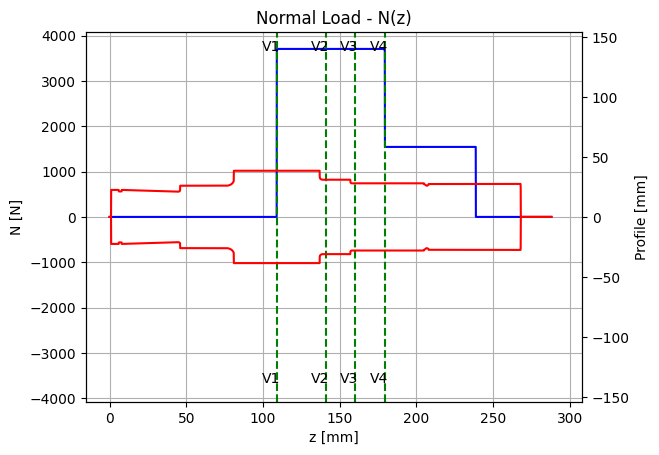

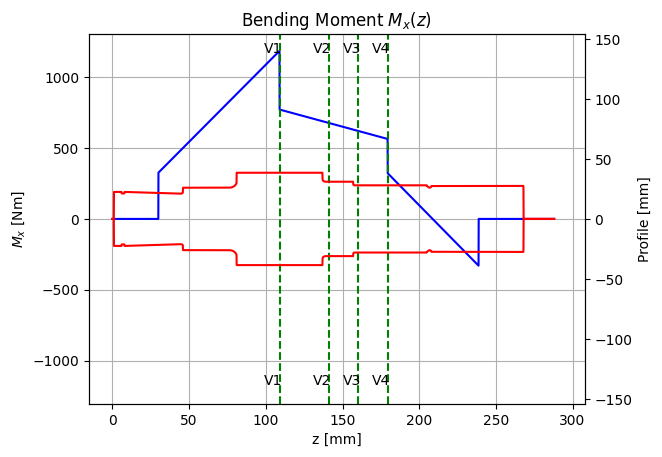

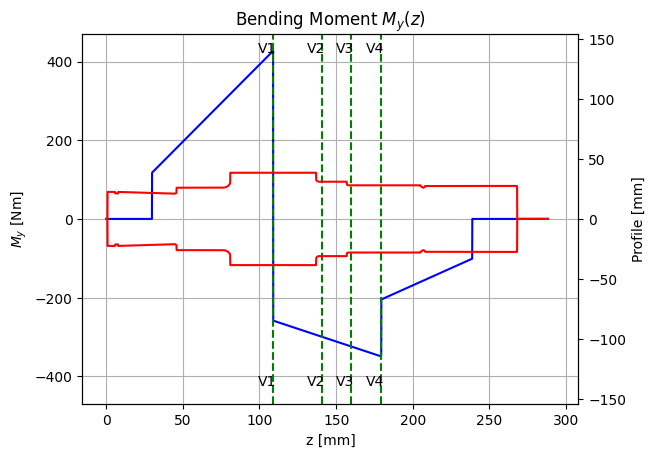

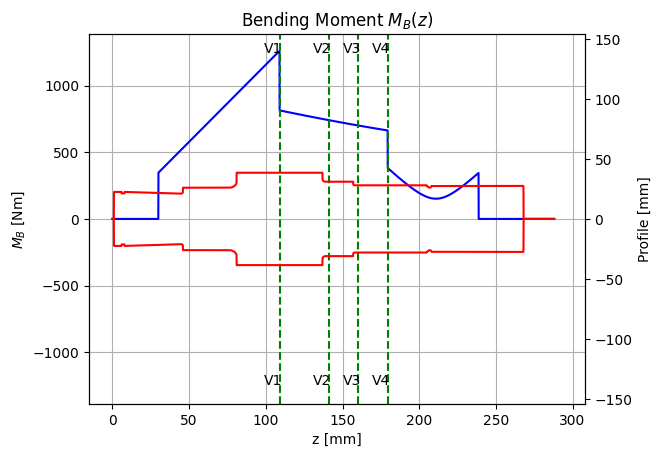

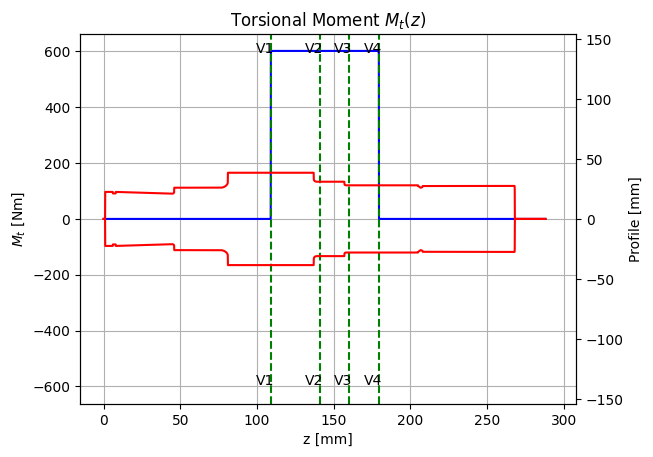

In [25]:
# Plot Internal Loads
A2.plotInternalLoads()

In [26]:
# Shaft A2: Calculate Stresses
A2.calculateStresses()
A2.calculateEquivalentAndIdealStress()

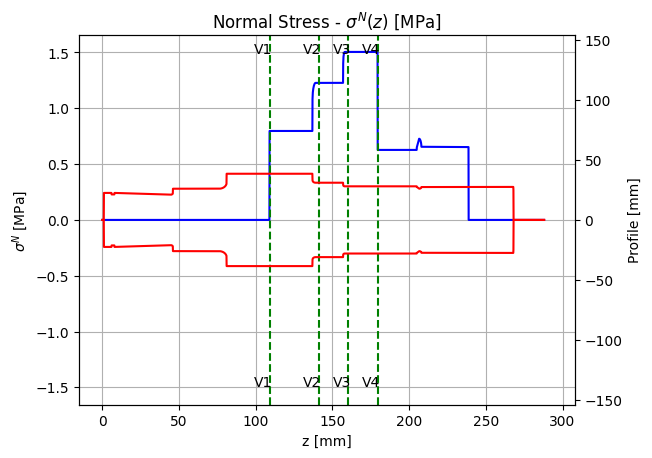

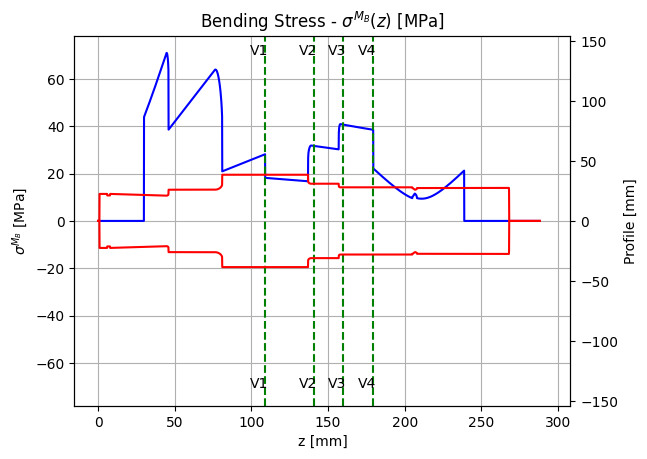

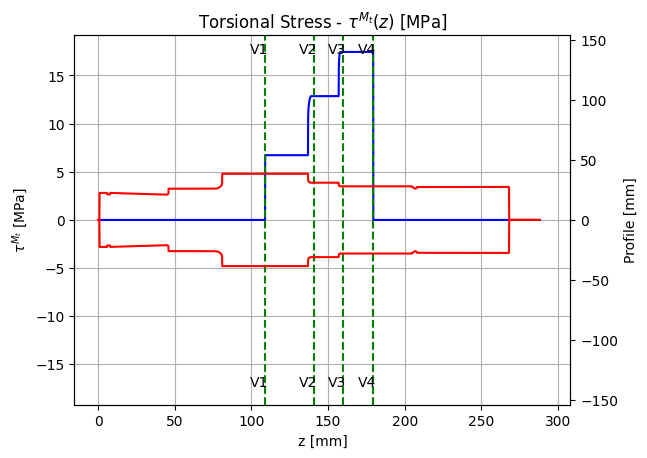

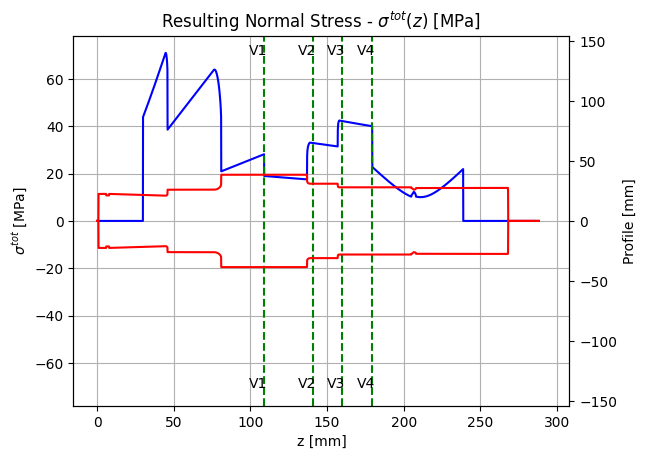

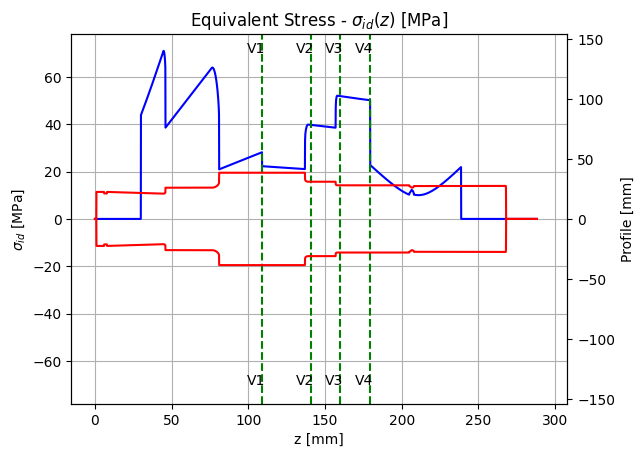

In [27]:
# Shaft A2: Plot Stresses
A2.plotStresses()

In [28]:
# Shaft A2: Static Safety Factors
A2.calculateStaticSafetyFactor(sections=userSections)

In [29]:
for section in userSections:
    print(section.staticSF)

41.75582817989578
23.417735694178006
17.92658614704321
18.547206409305186


In [30]:
# Calculate mean and alternating stresses
A2.calculateMeanAlternatingStress(sections=userSections)

In [31]:
# Fatigue limit corrector factor
A2.insertFLCF(sections=userSections)

In [32]:
# Equivalent mean and alternating stress
A2.calculateEquivalentStresses(sections=userSections)

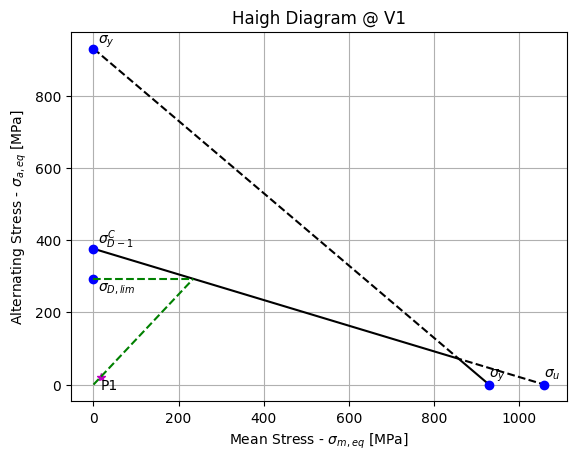

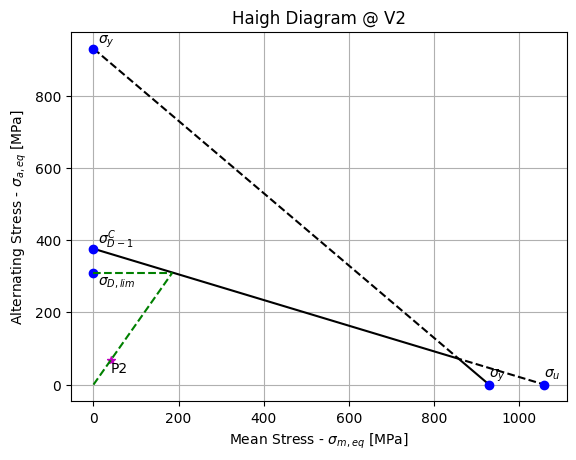

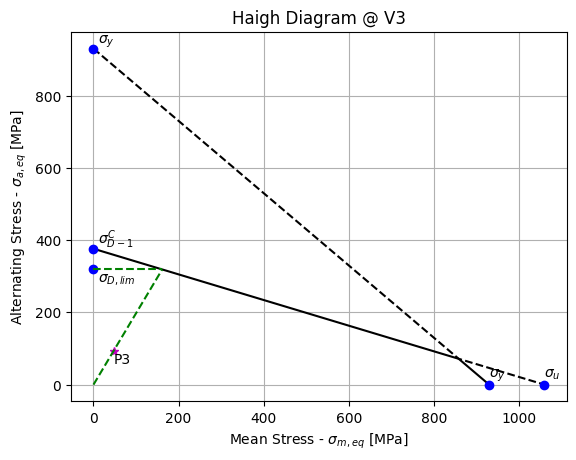

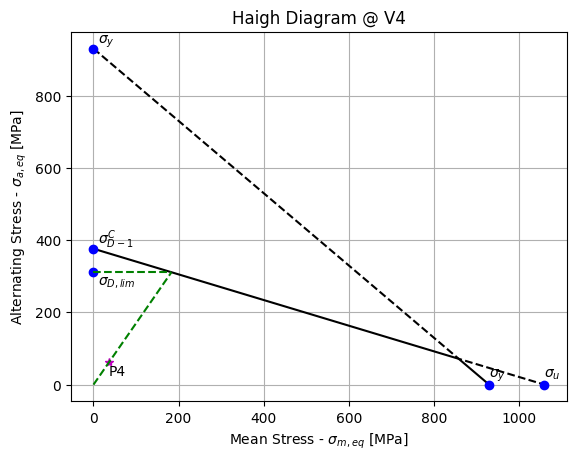

In [33]:
# Plot haigh diagram
for section in userSections:
    section.PlotHaighDiagram()

In [34]:
# Fatigue sagety factor
for section in A2.sections:
    section.CalculateFatigueSF()
    print(f"{section.name}: {section.fatigueSF}")

V1: 13.416628691004043
V2: 4.609936106805256
V3: 3.4160678012185213
V4: 5.048689060753657


In [35]:
# Gear G3: Maximum tooth gear bending stress
G3.calculateSigmaMaxFatigue(mesh=M2, powerSource="Uniform", drivenMachine="Uniform", dShaft=52, Ce=1, teethCond="uncrowned teeth", lShaft=a+b+c, useCond="Commercial, enclosed units")

In [36]:
G3.sigma_max_fatigue

np.float64(207.96303882850137)

In [37]:
G3.calculateBendingSF(sigma_FP=860, b_YN=1.3558, e_YN=-0.0178, N=1e8, temp=60, rel=0.99)

In [38]:
G3.bendingSF

array([4.03931689])

In [39]:
G3.calculateSigmaMaxPitting(mesh=M2, Z_R=1)

In [40]:
G3.sigma_max_pitting

np.float64(630.3970742375343)

In [41]:
G3.calculateWearSF(sigma_HP=1470, b_ZN=1.4488, e_ZN=-0.023, N=1e8, mesh=M2)

In [42]:
G3.wearSF

array([2.21162547])

In [43]:
# Calculate minimum load
A.calculateMinimumLoad()
B.calculateMinimumLoad()
C.calculateMinimumLoad()
D.calculateMinimumLoad()
E.calculateMinimumLoad()
F.calculateMinimumLoad()

A satisfies minimium load condition.
B satisfies minimium load condition.
C satisfies minimium load condition.
D satisfies minimium load condition.
E satisfies minimium load condition.
F satisfies minimium load condition.


In [44]:
A.Frm, B.Frm, C.Frm, D.Frm, E.Frm, F.Frm

(205.08923076923077,
 1456.9,
 394.33333333333337,
 2890.0,
 595.686274509804,
 2890.0)

In [45]:
# Equivalent static load
A.calculateEquivalentStaticLoad()
B.calculateEquivalentStaticLoad()
C.calculateEquivalentStaticLoad()
D.calculateEquivalentStaticLoad()
E.calculateEquivalentStaticLoad()
F.calculateEquivalentStaticLoad()

In [ ]:
# Safety factor for static bearing load
A.s0, B.s0, C.s0, D.s0, E.s0, F.s0

(np.float64(14.312679708055319),
 np.float64(11.704778471531958),
 np.float64(5.529080919895562),
 np.float64(15.00914513179128),
 np.float64(10.005672465151182),
 np.float64(7.371508897455888))

In [49]:
# Reliability factor
A.calculateA1(90)
B.calculateA1(90)
C.calculateA1(90)
D.calculateA1(90)
E.calculateA1(90)
F.calculateA1(90)

In [50]:
A.a1, B.a1, C.a1, D.a1, E.a1, F.a1

(np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0))

In [51]:
# Define oil of choice
oil = pygritbx.Oil(name="ISO VG 220", temp=60, v1=60, v=86)

In [52]:
# Bearing equivalent dynamic load
A.calculateEquivalentDynamicLoad()
B.calculateEquivalentDynamicLoad()
C.calculateEquivalentDynamicLoad()
D.calculateEquivalentDynamicLoad()
E.calculateEquivalentDynamicLoad()
F.calculateEquivalentDynamicLoad()

In [53]:
A.P, B.P, C.P, D.P, E.P, F.P

(np.float64(2550.1863204175133),
 np.float64(8268.179374787827),
 np.float64(11575.160669055444),
 np.float64(15611.714004164469),
 np.float64(8795.011060625435),
 np.float64(32023.737941797357))

In [54]:
# Contamination factor
A.calculateEtaC("Normal cleanliness")
B.calculateEtaC("Normal cleanliness")
C.calculateEtaC("Normal cleanliness")
D.calculateEtaC("Normal cleanliness")
E.calculateEtaC("Normal cleanliness")
F.calculateEtaC("Normal cleanliness")

In [55]:
A.eta_c, B.eta_c, C.eta_c, D.eta_c, E.eta_c, F.eta_c

(0.55, 0.55, 0.55, 0.55, 0.55, 0.55)

In [56]:
# Lubrication, contamination, and fatigue limit factor
A.a_skf = 8
B.a_skf = 3.2
C.a_skf = 4.7
D.a_skf = 6.4
E.a_skf = 4.01
F.a_skf = 1.93

In [57]:
# Calculate bearing life
A.calculateBearingLife()
B.calculateBearingLife()
C.calculateBearingLife()
D.calculateBearingLife()
E.calculateBearingLife()
F.calculateBearingLife()

In [58]:
A.L_10m, A.L_10mh, B.L_10m, B.L_10mh, C.L_10m, C.L_10mh, D.L_10m, D.L_10mh, E.L_10m, E.L_10mh, F.L_10m, F.L_10mh

(np.float64(106175.88003028206),
 np.float64(1179732.0003364675),
 np.float64(7769.38098588147),
 np.float64(86326.45539868301),
 np.float64(1849.0860125345475),
 np.float64(61636.20041781827),
 np.float64(18316.440923392103),
 np.float64(610548.0307797369),
 np.float64(9328.921476426785),
 np.float64(932892.1476426788),
 np.float64(503.67102737877246),
 np.float64(50367.10273787726))